In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import glob
import os

plt.style.use('ggplot') # Make the graphs a bit prettier

In [9]:
data = {}

for path in glob.glob(os.path.expanduser("~/ownCloud/ma_thesis/results/*.json")):
  for typename, items in json.load(open(path)).items():
    if typename in data:
      data[typename].update(items)
    else:
      data[typename] = items

frames = { typename: pd.DataFrame.from_dict(items, orient='index') for typename, items in data.items() }

In [10]:
program_runs = frames['program_run'].loc[lambda x: x.graph.str.contains('amazon')][:1]
merged = frames['algorithm_run'] \
    .loc[lambda x: x.order == 'original'] \
    .merge(program_runs, left_on='program_run_id', right_index=True)
    
runs_to_compare = pd.concat([merged.loc[lambda x: x.partition_count == 32], merged.loc[lambda x: x.algorithm == "sequential louvain"][:1]])

toplot = frames['cluster_size_distribution'].merge(frames['algorithm_level'], left_on='algorithm_level_id', right_index=True) \
    .loc[lambda x: x.level == 0] \
    .merge(runs_to_compare, left_on='algorithm_run_id', right_index=True)

toplot = toplot.fillna({'partition_algorithm': 'sequential'}) \
    .set_index('partition_algorithm') \
    [frames['cluster_size_distribution'].keys()].drop('algorithm_level_id', axis=1) \
    .transpose().dropna(how='all')
toplot.index = pd.to_numeric(toplot.index)
toplot = toplot.reindex(range(1, toplot.index.max() + 1)).fillna(0)

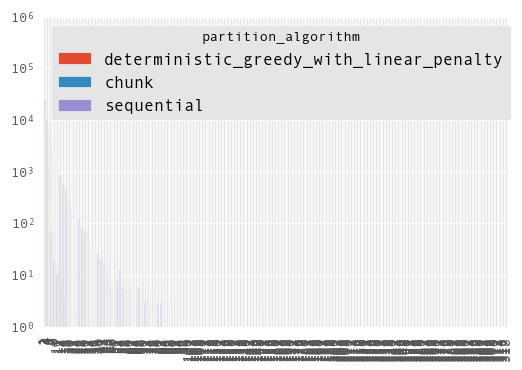

In [11]:
# toplot.plot.bar(logy=True)


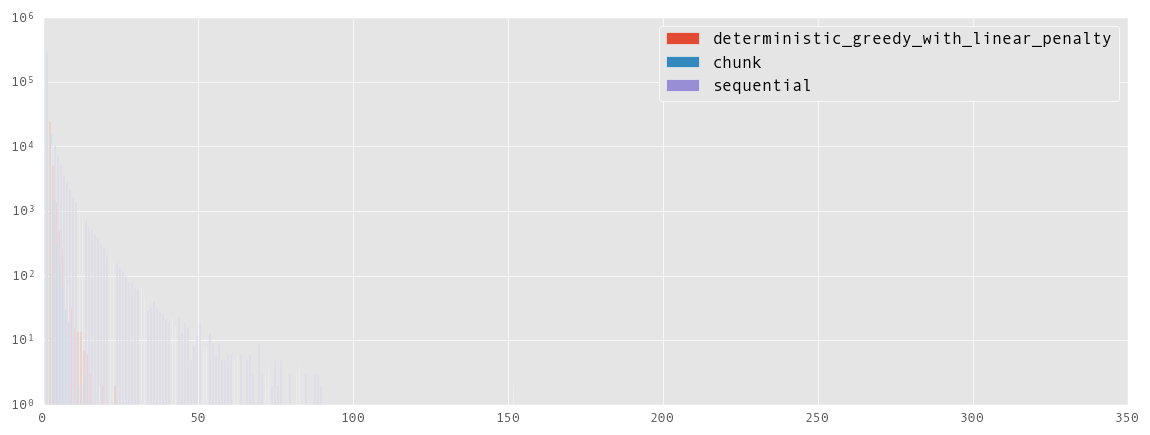

In [17]:
plt.figure(figsize=(14,5))
plt.hist([toplot.index for column in toplot.columns], weights=[toplot[column] for column in toplot.columns], bins=toplot.index, label=list(toplot.columns), log=True)
plt.legend()

In [13]:
toplot

partition_algorithm,deterministic_greedy_with_linear_penalty,chunk,sequential
1,257458.0,296623.0,0.0
2,24901.0,15286.0,11297.0
3,5056.0,1499.0,10339.0
4,1387.0,331.0,7048.0
5,511.0,145.0,5098.0
6,267.0,65.0,3729.0
7,97.0,30.0,2794.0
8,72.0,19.0,2177.0
9,32.0,16.0,1620.0
10,16.0,10.0,1381.0
